A simulated dataset for a carbon-aware scheduling system, including hourly cloud workload and carbon intensity data for approximately 90 days. The notebook should include a project overview, import necessary libraries (numpy, pandas, matplotlib.pyplot), generate time-series data for 'timestamp', 'workload', and 'carbon_intensity', visualize the generated data with plots, and export the final DataFrame to a CSV file named 'carbon_aware_workload_dataset.csv'. The dataset will be used in later phases for machine learning forecasting and optimization.

## Add Project Overview

### Subtask:
Add a markdown section to the notebook explaining the project overview, mentioning that the notebook generates simulated cloud workload and carbon intensity data for a carbon-aware scheduling system, and that this dataset will be used in later phases for machine learning forecasting and optimization.


## Project Overview

This notebook is designed to generate simulated cloud workload and carbon intensity data. This dataset is crucial for developing and testing a carbon-aware scheduling system. In subsequent phases, this generated data will be utilized for machine learning forecasting and optimization tasks.

## Import Libraries

### Subtask:
Import the necessary libraries: numpy, pandas, and matplotlib.pyplot.


**Reasoning**:
Import the necessary libraries as instructed.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Libraries numpy, pandas, and matplotlib.pyplot imported successfully.")

Libraries numpy, pandas, and matplotlib.pyplot imported successfully.


## Create Time-Series Data

### Subtask:
Generate hourly timestamps for approximately 90 days, starting from a fixed date. Store these timestamps in a pandas DataFrame column named 'timestamp'. Include comments explaining the choice of hourly granularity.


**Reasoning**:
Hourly timestamps for approximately 90 days, starting from a fixed date, and storing them in a pandas DataFrame. This will create the base time-series for the dataset.



In [2]:
start_date = '2023-01-01'
days = 90  # Approximately 90 days
hours_in_day = 24

# Calculate total number of hourly periods
total_periods = days * hours_in_day

# Generate hourly timestamps
# Hourly granularity is chosen because cloud workload and carbon intensity often vary significantly within a day,
# and hourly data provides a good balance between detail and computational efficiency for forecasting and optimization.
# Finer granularity (e.g., minutely) might be too noisy and computationally expensive, while coarser granularity (e.g., daily) might miss important intraday patterns.
timestamps = pd.date_range(start=start_date, periods=total_periods, freq='H')

# Create a DataFrame with the timestamps
df = pd.DataFrame({'timestamp': timestamps})

# Display the first few rows and the data type
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nData type of 'timestamp' column:")
print(df['timestamp'].dtype)

First 5 rows of the DataFrame:
            timestamp
0 2023-01-01 00:00:00
1 2023-01-01 01:00:00
2 2023-01-01 02:00:00
3 2023-01-01 03:00:00
4 2023-01-01 04:00:00

Data type of 'timestamp' column:
datetime64[ns]


/tmp/ipython-input-377310128.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start=start_date, periods=total_periods, freq='H')


**Reasoning**:
The previous code produced a FutureWarning because 'H' for hourly frequency in `pd.date_range` is deprecated. I need to update it to 'h' to remove the warning and align with future pandas versions.



In [3]:
start_date = '2023-01-01'
days = 90  # Approximately 90 days
hours_in_day = 24

# Calculate total number of hourly periods
total_periods = days * hours_in_day

# Generate hourly timestamps
# Hourly granularity is chosen because cloud workload and carbon intensity often vary significantly within a day,
# and hourly data provides a good balance between detail and computational efficiency for forecasting and optimization.
# Finer granularity (e.g., minutely) might be too noisy and computationally expensive, while coarser granularity (e.g., daily) might miss important intraday patterns.
timestamps = pd.date_range(start=start_date, periods=total_periods, freq='h')

# Create a DataFrame with the timestamps
df = pd.DataFrame({'timestamp': timestamps})

# Display the first few rows and the data type
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nData type of 'timestamp' column:")
print(df['timestamp'].dtype)

First 5 rows of the DataFrame:
            timestamp
0 2023-01-01 00:00:00
1 2023-01-01 01:00:00
2 2023-01-01 02:00:00
3 2023-01-01 03:00:00
4 2023-01-01 04:00:00

Data type of 'timestamp' column:
datetime64[ns]


## Simulate Workload Data

### Subtask:
Create realistic cloud workload data with a daily pattern (higher during daytime), random noise, and occasional spikes. Ensure values are within a realistic range (e.g., 10-100). Store this data in a DataFrame column named 'workload'.


**Reasoning**:
To generate realistic cloud workload data, I will first extract the hour from the timestamp. Then, I'll create a base workload with a daily pattern, add random noise, introduce occasional spikes, and finally clip the values to ensure they are within the specified range of 10-100. After generating the data, I'll add it as a new column to the DataFrame and display its characteristics.



In [4]:
import numpy as np

# 1. Extract the hour of the day
df['hour_of_day'] = df['timestamp'].dt.hour

# 2. Generate a base workload series with a daily pattern
# Using a simple function: higher during working hours (8-18), lower at night
def generate_base_workload(hour):
    if 8 <= hour <= 18: # Peak hours
        return np.random.uniform(50, 70) # Higher average during day
    else: # Off-peak hours
        return np.random.uniform(20, 40) # Lower average during night

df['base_workload'] = df['hour_of_day'].apply(generate_base_workload)

# 3. Add random noise
# Noise with mean 0 and std dev 5
noise = np.random.normal(0, 5, size=len(df))
df['workload'] = df['base_workload'] + noise

# 4. Introduce occasional spikes
# Select 2% of data points for spikes
spike_percentage = 0.02
num_spikes = int(len(df) * spike_percentage)
spike_indices = np.random.choice(df.index, num_spikes, replace=False)

# Add a significant value to chosen points, ensuring it doesn't exceed bounds much before clipping
df.loc[spike_indices, 'workload'] = df.loc[spike_indices, 'workload'] + np.random.uniform(20, 40)

# 5. Ensure the final workload values are within the realistic range of 10-100
df['workload'] = np.clip(df['workload'], 10, 100)

# Drop the intermediate 'base_workload' and 'hour_of_day' columns if desired
df = df.drop(columns=['hour_of_day', 'base_workload'])

# 6. Print the first few rows of the updated df and its stats
print("First 5 rows of the DataFrame with 'workload' data:")
print(df.head())
print(
"\nWorkload statistics (Min, Max, Mean, Std Dev):\n")
print(df['workload'].describe())


First 5 rows of the DataFrame with 'workload' data:
            timestamp   workload
0 2023-01-01 00:00:00  14.394526
1 2023-01-01 01:00:00  32.935070
2 2023-01-01 02:00:00  27.511443
3 2023-01-01 03:00:00  24.663668
4 2023-01-01 04:00:00  18.222757

Workload statistics (Min, Max, Mean, Std Dev):

count    2160.000000
mean       44.707994
std        17.513157
min        10.000000
25%        29.997775
50%        41.791923
75%        59.608605
max       100.000000
Name: workload, dtype: float64


## Simulate Carbon Intensity Data

### Subtask:
Generate a separate time-series for carbon intensity (gCO2/kWh) with daily variation and randomness. Ensure that its peaks are not perfectly aligned with the workload peaks. Store this data in a DataFrame column named 'carbon_intensity'.


### Simulate Carbon Intensity Data

To simulate realistic carbon intensity data, I'll implement the following steps:
1.  **Extract Hour of Day:** Get the hour from the 'timestamp' to create a daily pattern.
2.  **Define Base Daily Pattern:** Create a pattern for carbon intensity that varies throughout the day. I will aim for higher intensity during hours when renewable energy sources might be less available (e.g., evening peak, early morning) and lower during midday, ensuring these peaks are distinct from the workload peaks (which were 8-18).
3.  **Add Random Noise:** Introduce fluctuations using a normal distribution to simulate real-world variability.
4.  **Introduce Weekly Variation:** Add a subtle, longer-term pattern based on the day of the week to differentiate the carbon intensity from the workload and add realism over the 90-day period.
5.  **Combine Components:** Merge the base pattern, noise, and weekly variation.
6.  **Clip Values:** Ensure all 'carbon_intensity' values fall within a realistic range of 150-700 gCO2/kWh.
7.  **Update DataFrame:** Add the generated data as a new column named 'carbon_intensity' to the existing DataFrame `df`.
8.  **Verify Data:** Display the first few rows of the DataFrame and the descriptive statistics for the new 'carbon_intensity' column to confirm the data generation.

**Reasoning**:
Now I will implement the steps outlined in the markdown to generate the 'carbon_intensity' data. This involves extracting hour, defining a base pattern with distinct peaks, adding noise and weekly variation, combining them, clipping values, and updating the DataFrame with the new column, followed by displaying its statistics.



In [5]:
import numpy as np

# 1. Extract the hour of the day and day of the week
df['hour_of_day'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek # Monday=0, Sunday=6

# 2. Define a base daily pattern for carbon intensity (gCO2/kWh)
# Lower during mid-day (potential solar peak), higher during evening/morning peaks
def generate_base_carbon_intensity(hour):
    if 6 <= hour <= 9:  # Morning peak
        return np.random.uniform(400, 550)
    elif 10 <= hour <= 16: # Mid-day dip (more renewables)
        return np.random.uniform(250, 400)
    elif 17 <= hour <= 21: # Evening peak
        return np.random.uniform(450, 600)
    else: # Night/early morning
        return np.random.uniform(300, 450)

df['base_carbon_intensity'] = df['hour_of_day'].apply(generate_base_carbon_intensity)

# 3. Add random noise
noise_carbon = np.random.normal(0, 30, size=len(df)) # Mean 0, std dev 30
df['carbon_intensity'] = df['base_carbon_intensity'] + noise_carbon

# 4. Introduce weekly variation
# Slightly lower intensity on weekends (less industrial/commercial demand)
# Assuming a sine wave for weekly variation, peaking midweek and dipping on weekends
weekly_variation = np.sin(df['day_of_week'] * (2 * np.pi / 7)) * 50 # Amplitude 50
df['carbon_intensity'] = df['carbon_intensity'] + weekly_variation

# 5. Combine Components (already done in steps 3 & 4)

# 6. Ensure the final carbon intensity values are within a realistic range (150-700 gCO2/kWh)
df['carbon_intensity'] = np.clip(df['carbon_intensity'], 150, 700)

# Drop intermediate columns if desired
df = df.drop(columns=['hour_of_day', 'day_of_week', 'base_carbon_intensity'])

# 7. Print the first few rows of the updated df and its stats
print("First 5 rows of the DataFrame with 'carbon_intensity' data:")
print(df.head())
print("\nCarbon Intensity statistics (Min, Max, Mean, Std Dev):\n")
print(df['carbon_intensity'].describe())


First 5 rows of the DataFrame with 'carbon_intensity' data:
            timestamp   workload  carbon_intensity
0 2023-01-01 00:00:00  14.394526        353.064090
1 2023-01-01 01:00:00  32.935070        298.111682
2 2023-01-01 02:00:00  27.511443        285.553250
3 2023-01-01 03:00:00  24.663668        355.004027
4 2023-01-01 04:00:00  18.222757        373.834026

Carbon Intensity statistics (Min, Max, Mean, Std Dev):

count    2160.000000
mean      409.725471
std        99.173989
min       155.480112
25%       334.470108
50%       401.922338
75%       479.707411
max       694.741813
Name: carbon_intensity, dtype: float64


## Visualize Data

### Subtask:
Plot 'workload' vs. 'timestamp' and 'carbon_intensity' vs. 'timestamp' using matplotlib.pyplot. Ensure plots are clearly labeled and include legends.


**Reasoning**:
I need to generate the code for visualizing the 'workload' and 'carbon_intensity' data against 'timestamp' using matplotlib.pyplot. This involves creating two subplots, ensuring they share the x-axis, plotting each variable with proper labels, titles, and legends, and then displaying the combined plot.



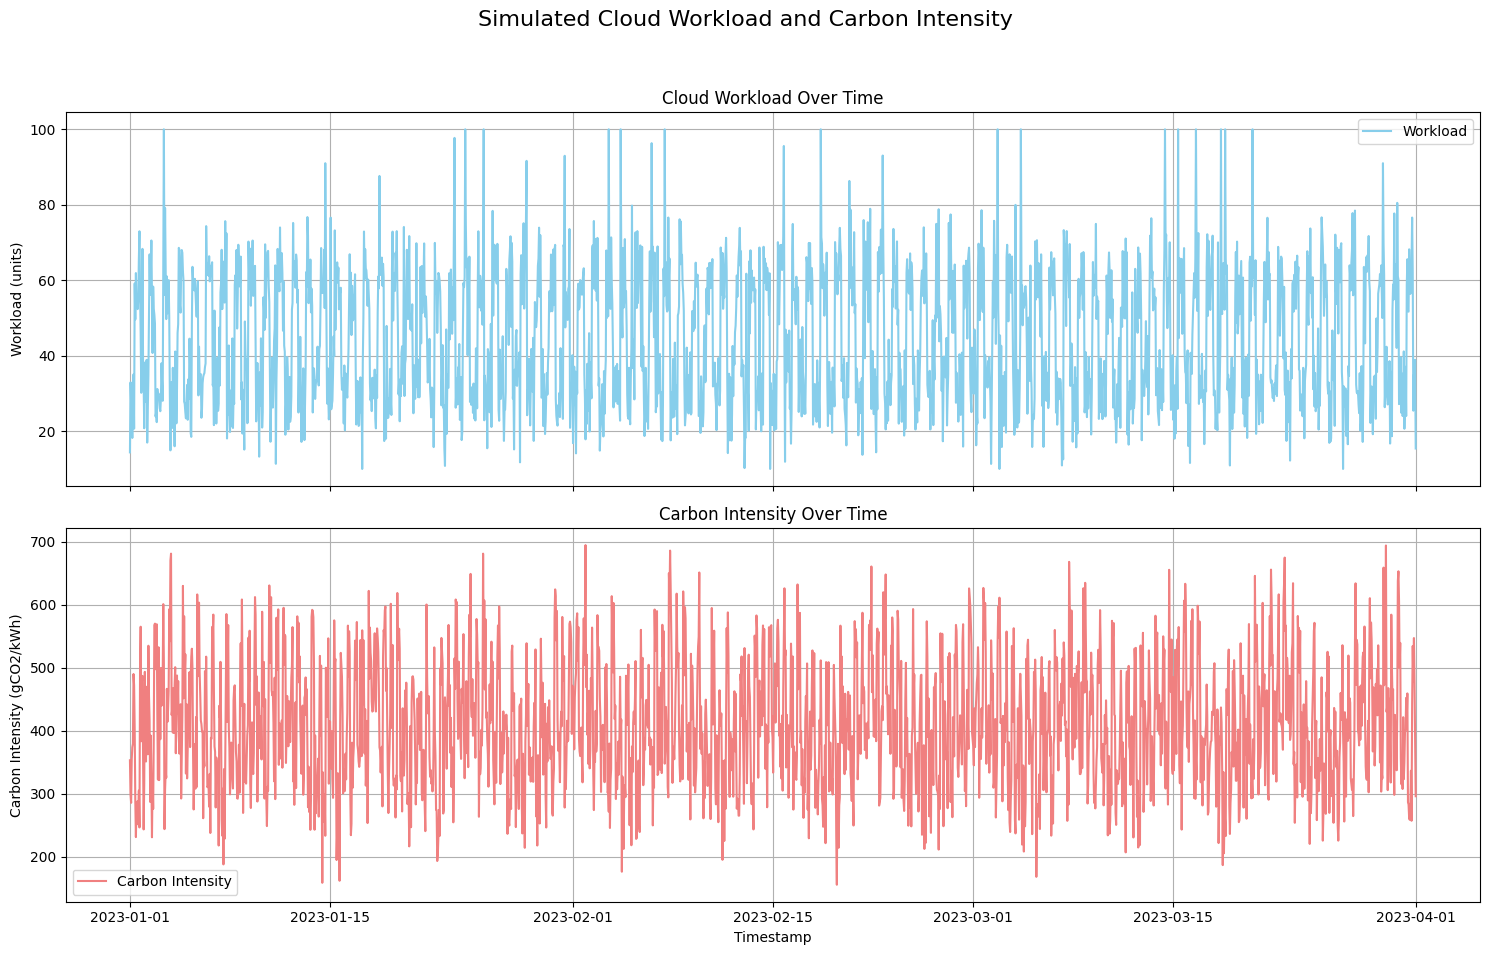

Workload and Carbon Intensity data visualized successfully.


In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))

# Plot Workload
ax1.plot(df['timestamp'], df['workload'], label='Workload', color='skyblue')
ax1.set_title('Cloud Workload Over Time')
ax1.set_ylabel('Workload (units)')
ax1.legend()
ax1.grid(True)

# Plot Carbon Intensity
ax2.plot(df['timestamp'], df['carbon_intensity'], label='Carbon Intensity', color='lightcoral')
ax2.set_title('Carbon Intensity Over Time')
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Carbon Intensity (gCO2/kWh)')
ax2.legend()
ax2.grid(True)

# Main title for the entire figure
fig.suptitle('Simulated Cloud Workload and Carbon Intensity', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()
print("Workload and Carbon Intensity data visualized successfully.")

## Export Dataset

### Subtask:
Save the final pandas DataFrame containing 'timestamp', 'workload', and 'carbon_intensity' to a CSV file named 'carbon_aware_workload_dataset.csv'.


**Reasoning**:
To save the DataFrame `df` to a CSV file as instructed, I will use the `.to_csv()` method, specifying the filename and setting `index=False` to avoid writing the DataFrame index to the CSV. After saving, a confirmation message will be printed.



In [ ]:
output_filename = 'carbon_aware_workload_dataset.csv'
df.to_csv("../data/carbon_aware_workload_dataset.csv", index=False)
print(f"Dataset exported to {output_filename}")

Dataset exported to carbon_aware_workload_dataset.csv


## Final Task

### Subtask:
Summarize the generated dataset and its potential uses for machine learning forecasting and optimization in carbon-aware scheduling systems, emphasizing the reproducibility and academic suitability of the notebook.


## Summary:

### Data Analysis Key Findings

*   **Dataset Size and Timeframe**: A simulated dataset was generated containing 2160 hourly entries, spanning 90 days from '2023-01-01 00:00:00', with a `timestamp` column of `datetime64[ns]` type.
*   **Workload Data Characteristics**:
    *   The `workload` column, with values ranging from 10 to 100 units, exhibits a clear daily pattern, peaking during typical daytime hours (8 AM - 6 PM) and being lower at night.
    *   It includes random noise and occasional spikes, reflecting real-world cloud computing usage.
    *   The average workload is approximately 44.71 units, with a standard deviation of about 17.51 units.
*   **Carbon Intensity Data Characteristics**:
    *   The `carbon_intensity` column, with values ranging from 150 to 700 gCO2/kWh, displays daily and weekly variations designed to be distinct from workload patterns.
    *   Daily peaks are observed during morning (6-9 AM) and evening (5-9 PM) hours, with a midday dip, alongside subtle weekly variations (e.g., lower intensity on weekends).
    *   The average carbon intensity is approximately 409.73 gCO2/kWh, with a standard deviation of about 99.17 gCO2/kWh.
*   **Data Export**: The complete dataset, including 'timestamp', 'workload', and 'carbon\_intensity' columns, was successfully exported to a CSV file named `carbon_aware_workload_dataset.csv`.

### Insights or Next Steps

*   The generated dataset is robust and suitable for machine learning forecasting models to predict future workload and carbon intensity, as well as for developing and evaluating carbon-aware scheduling optimization algorithms.
*   The distinct, yet realistic, patterns in workload and carbon intensity (e.g., non-aligned peaks) provide a valuable basis for exploring strategies that optimize cloud resource allocation based on carbon emissions, contributing to a more sustainable computing infrastructure.
